In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('jan24pub.csv')

# Print initial info to understand the columns
print("Available columns related to employment and industry:")
employment_cols = [col for col in df.columns if 'PEIO' in col or 'PRMJIND' in col or 'PEMLR' in col]
print(employment_cols)

education_mapping = {
    31: 'Less than 1st grade',
    32: '1st-4th grade',
    33: '5th-6th grade',
    34: '7th-8th grade',
    35: '9th grade',
    36: '10th grade',
    37: '11th grade',
    38: '12th grade, no diploma',
    39: 'High school graduate',
    40: 'Some college, no degree',
    41: 'Associate degree - occupational',
    42: 'Associate degree - academic',
    43: "Bachelor's degree",
    44: "Master's degree",
    45: 'Professional degree',
    46: 'Doctorate degree'
}

df['age_group'] = pd.cut(df['PRTAGE'], 
                        bins=[0, 25, 35, 45, 55, 65, 100],
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

education_levels = ['12th grade, no diploma', 'High school graduate', 'Some college, no degree',
                    'Associate degree', 'Bachelor’s degree', 'Master’s degree', 'Professional degree',
                    'Doctorate degree']

print("\nUnique values in PEEDUCA:")
print(df['PEEDUCA'].value_counts())

Available columns related to employment and industry:
['PEMLR', 'PEIO1COW', 'PEIO2COW', 'PRMJIND1', 'PRMJIND2', 'PEIO1ICD', 'PEIO2ICD']

Unique values in PEEDUCA:
PEEDUCA
-1     44356
 39    22847
 43    17573
 40    12651
 44     7866
 42     4622
 41     3849
 37     2261
 36     2096
 35     1887
 46     1658
 38     1388
 34     1258
 45     1134
 33      762
 32      368
 31      226
Name: count, dtype: int64


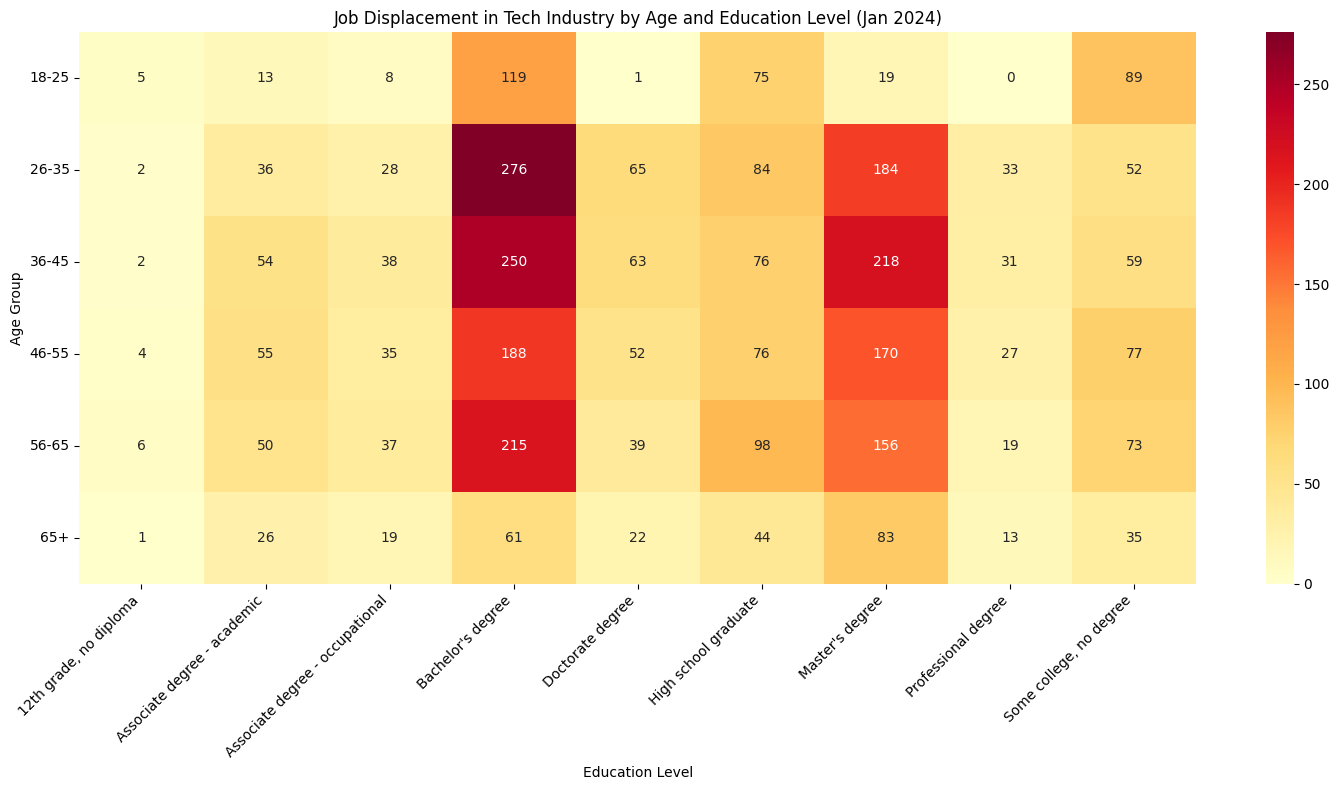

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from a CSV file into a DataFrame
jan24_df = pd.read_csv('jan24pub.csv')

# Create a mapping for education levels based on numeric codes
education_mapping = {
    31: 'Less than 1st grade',
    32: '1st-4th grade',
    33: '5th-6th grade',
    34: '7th-8th grade',
    35: '9th grade',
    36: '10th grade',
    37: '11th grade',
    38: '12th grade, no diploma',
    39: 'High school graduate',
    40: 'Some college, no degree',
    41: 'Associate degree - occupational',
    42: 'Associate degree - academic',
    43: "Bachelor's degree",
    44: "Master's degree",
    45: 'Professional degree',
    46: 'Doctorate degree'
}

# Map the education codes to their corresponding labels
jan24_df['education'] = jan24_df['PEEDUCA'].map(education_mapping)

# Create age groups by binning the age column into specified ranges
jan24_df['age_group'] = pd.cut(jan24_df['PRTAGE'], 
                        bins=[0, 25, 35, 45, 55, 65, 100],  # Define age ranges
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])  # Assign labels to each range

# Filter the data for displaced workers in the tech industry
# PEIO1COW and PEIO2COW represent employment status; 5 indicates displaced workers
displaced_tech_jan24_df = jan24_df[(jan24_df['PEIO1COW'] == 5) | (jan24_df['PEIO2COW'] == 5)]

# Further filter for workers with at least a high school diploma (education code >= 38)
displaced_tech_jan24_df = displaced_tech_jan24_df[displaced_tech_jan24_df['PEEDUCA'] >= 38]

# Create a crosstab (pivot table) to summarize the number of displaced workers by age group and education level
heatmap_data_jan24 = pd.crosstab(displaced_tech_jan24_df['age_group'], displaced_tech_jan24_df['education'])

# Create a heatmap to visualize the data
plt.figure(figsize=(15, 8))  # Set the figure size
sns.heatmap(heatmap_data_jan24, annot=True, fmt='d', cmap='YlOrRd')  # Generate the heatmap with annotations (data in boxes)
plt.title('Job Displacement in Tech Industry by Age and Education Level (Jan 2024)')  # Add a title
plt.xlabel('Education Level')  # Label the x-axis
plt.ylabel('Age Group')  # Label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset
jan20pub_df = pd.read_csv('jan20pub.csv')

# Display the first few rows to understand the structure
print(jan20pub_df.head())

# Check the columns to ensure we have the necessary data
print(jan20pub_df.columns)

            HRHHID  HRMONTH  HRYEAR4  HURESPLI  HUFINAL  FILLER  HETENURE  \
0  710000960815181        1     2020         2      201     NaN         1   
1  710000960815181        1     2020         2      201     NaN         1   
2     110024067491        1     2020         1      201     NaN         2   
3  201006740110940        1     2020         1      201     NaN         2   
4  761077501690006        1     2020         1      201     NaN         1   

   HEHOUSUT  HETELHHD  HETELAVL  ...  PEST26  PEST27  PEST31  PRSUPSAT  \
0         1         1        -1  ...      -1      -1      -1         2   
1         1         1        -1  ...       2      -1      -1         2   
2         1         1        -1  ...      -1      -1      -1         2   
3         1         1        -1  ...      -1      -1      -1         2   
4         5         1        -1  ...      -1      -1      -1         2   

   PWSUPWGT  PRTENSAT  PWTENWGT  PTST1TN  PTSD18TN  PRDISPWK  
0  33951097         2  353005

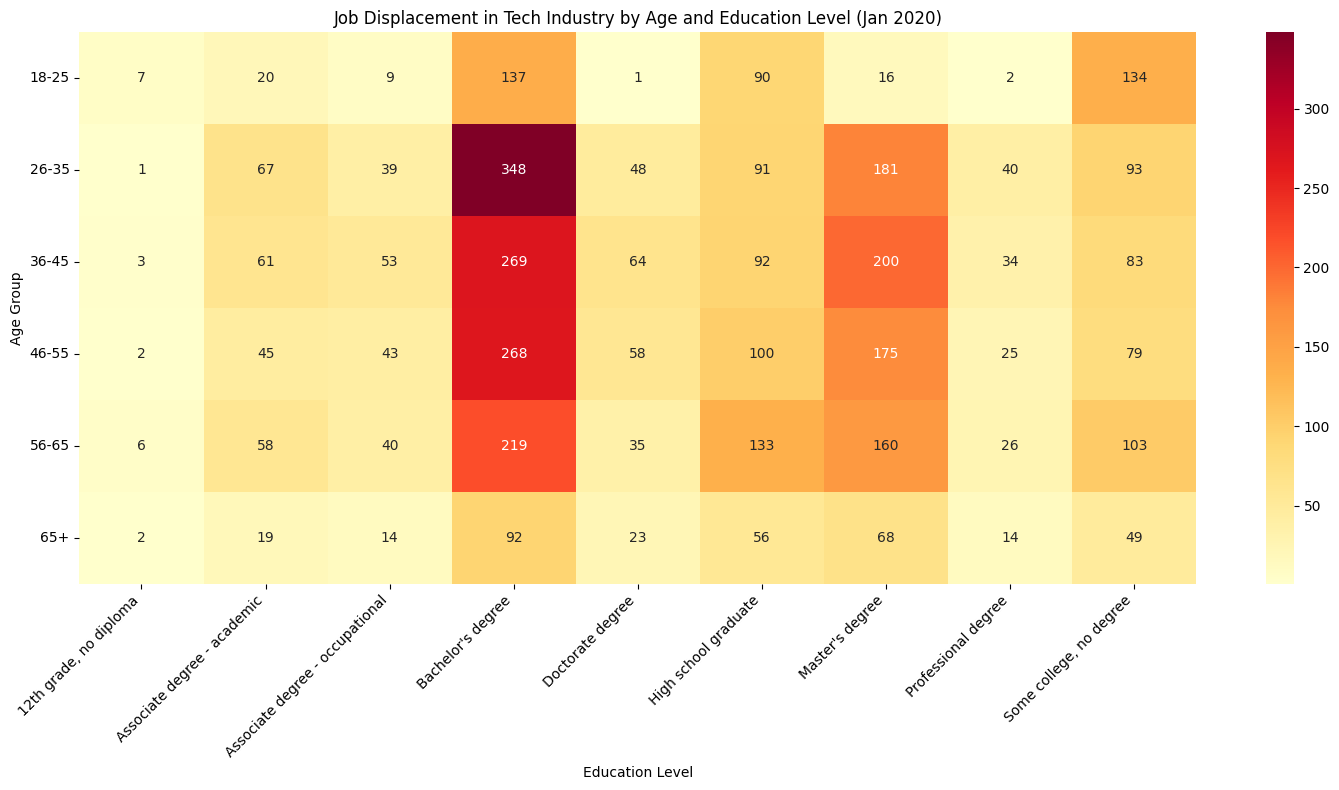

In [18]:
# Filter for displaced workers in the tech industry
# Assuming 'PEIO1COW' or 'PEIO2COW' indicates displacement (code 5 for displaced)
displaced_tech_jan20_df = jan20pub_df[(jan20pub_df['PEIO1COW'] == 5) | (jan20pub_df['PEIO2COW'] == 5)]

# Filter for education level 12th grade no diploma and above
# Using the education mapping created earlier
displaced_tech_jan20_df = displaced_tech_jan20_df[displaced_tech_jan20_df['PEEDUCA'] >= 38]

# Create a crosstab for age group and education level
displaced_tech_jan20_df['education'] = displaced_tech_jan20_df['PEEDUCA'].map(education_mapping)
displaced_tech_jan20_df['age_group'] = pd.cut(displaced_tech_jan20_df['PRTAGE'], 
                        bins=[0, 25, 35, 45, 55, 65, 100],
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

heatmap_data_jan20 = pd.crosstab(displaced_tech_jan20_df['age_group'], displaced_tech_jan20_df['education'])

# Plotting the heatmap with labels
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_jan20, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Job Displacement in Tech Industry by Age and Education Level (Jan 2020)')
plt.xlabel('Education Level')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

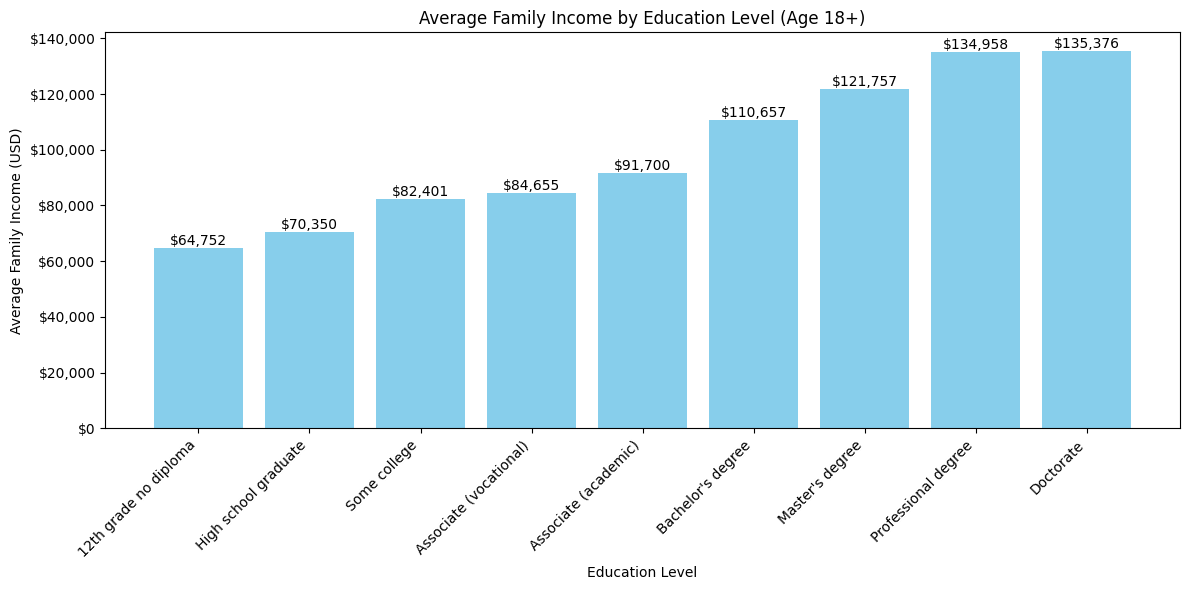

Average Family Income by Education Level:
12th grade no diploma: $64,751.67
High school graduate: $70,349.52
Some college: $82,400.65
Associate (vocational): $84,655.31
Associate (academic): $91,699.75
Bachelor's degree: $110,657.18
Master's degree: $121,756.52
Professional degree: $134,958.04
Doctorate: $135,376.21


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a proper copy of the filtered dataframe
df_adult = df[(df['PRTAGE'] >= 18) & (df['PEEDUCA'] >= 38)].copy()

# Create mapping for education levels
education_mapping = {
    38: '12th grade no diploma',
    39: 'High school graduate',
    40: 'Some college',
    41: 'Associate (vocational)',
    42: 'Associate (academic)',
    43: 'Bachelor\'s degree',
    44: 'Master\'s degree',
    45: 'Professional degree',
    46: 'Doctorate'
}

# Create mapping for income levels (using middle of range)
income_mapping = {
    1: 2500,    # Less than $5,000
    2: 6250,    # $5,000 to $7,499
    3: 8750,    # $7,500 to $9,999
    4: 11250,   # $10,000 to $12,499
    5: 13750,   # $12,500 to $14,999
    6: 17500,   # $15,000 to $19,999
    7: 22500,   # $20,000 to $24,999
    8: 27500,   # $25,000 to $29,999
    9: 32500,   # $30,000 to $34,999
    10: 37500,  # $35,000 to $39,999
    11: 45000,  # $40,000 to $49,999
    12: 55000,  # $50,000 to $59,999
    13: 67500,  # $60,000 to $74,999
    14: 87500,  # $75,000 to $99,999
    15: 125000, # $100,000 to $149,999
    16: 175000  # $150,000 or more
}

# Create new columns with mapped values
df_adult['Education'] = df_adult['PEEDUCA'].map(education_mapping)
df_adult['Income_USD'] = df_adult['HEFAMINC'].map(income_mapping)

# Calculate mean income for each education level
income_by_education = df_adult.groupby('Education')['Income_USD'].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(income_by_education.index, income_by_education.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Average Family Income (USD)')
plt.title('Average Family Income by Education Level (Age 18+)')

# Format y-axis labels as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the exact values
print("\
Average Family Income by Education Level:")
for edu, inc in income_by_education.items():
    print(f"{edu}: ${inc:,.2f}")

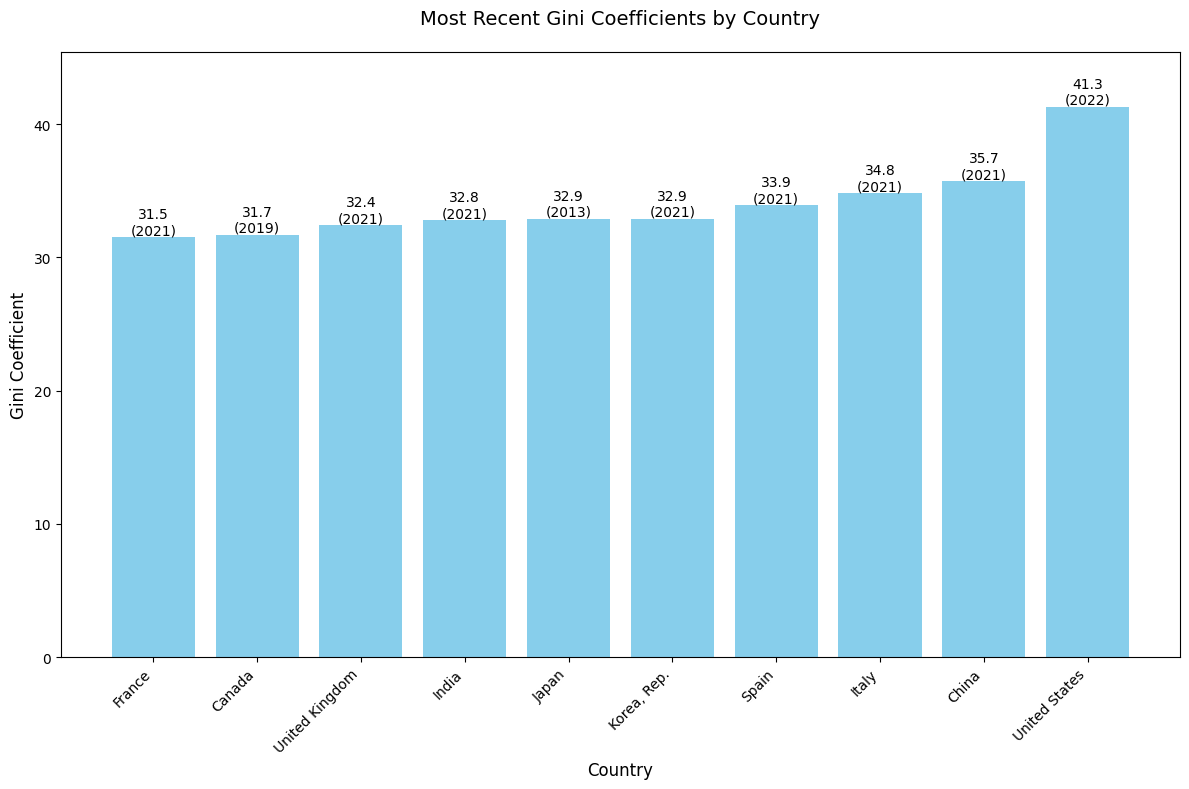

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file, skipping the first 4 rows which contain metadata
gini_data = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_105.csv', skiprows=4)

# List of countries to analyze
countries_of_interest = ['United States', 'United Kingdom', 'Russia', 'China', 'Japan', 
                        'Korea, Rep.', 'Canada', 'France', 'India', 'Spain', 'Italy']

# Filter the data for the selected countries
gini_selected_countries = gini_data[gini_data['Country Name'].isin(countries_of_interest)]

# Get the most recent non-null value for each country
numeric_columns = gini_selected_countries.select_dtypes(include=['float64']).columns
result = []

for country in countries_of_interest:
    country_data = gini_selected_countries[gini_selected_countries['Country Name'] == country]
    if not country_data.empty:
        # Get the most recent year with data
        country_values = country_data[numeric_columns].iloc[0]
        last_valid_year = country_values.last_valid_index()
        last_valid_value = country_values[last_valid_year]
        
        result.append({
            'Country': country,
            'Year': last_valid_year,
            'Gini Coefficient': last_valid_value
        })

# Convert to DataFrame and sort by Gini Coefficient
result_df = pd.DataFrame(result)
result_df = result_df.sort_values('Gini Coefficient', ascending=True)

# Create the bar graph with adjusted figure size and margins
plt.figure(figsize=(12, 8))  # Increased height from 6 to 8
bars = plt.bar(result_df['Country'], result_df['Gini Coefficient'], color='skyblue')
plt.title('Most Recent Gini Coefficients by Country', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Set y-axis limits with more padding at the top
plt.ylim(0, max(result_df['Gini Coefficient']) * 1.1)  # 15% padding at the top

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}\n({result_df.iloc[i]["Year"]})',
             ha='center', va='bottom')

# Adjust layout with more padding
plt.tight_layout()
plt.show()

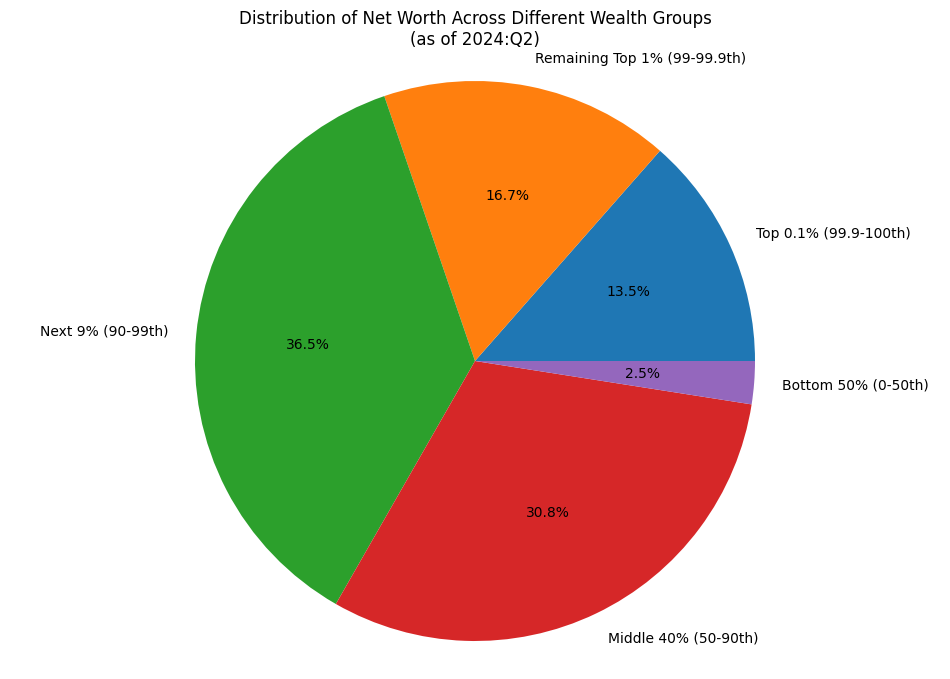


Net Worth Distribution (in thousands of dollars) as of 2024:Q2
Top 0.1% (99.9-100th): $20,866,484
Remaining Top 1% (99-99.9th): $25,838,143
Next 9% (90-99th): $56,307,717
Middle 40% (50-90th): $47,549,958
Bottom 50% (0-50th): $3,824,129


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('dfa-networth-levels.csv')

# Create category mapping with percentile ranges
category_mapping_with_ranges = {
    'TopPt1': 'Top 0.1% (99.9-100th)',
    'RemainingTop1': 'Remaining Top 1% (99-99.9th)',
    'Next9': 'Next 9% (90-99th)',
    'Next40': 'Middle 40% (50-90th)',
    'Bottom50': 'Bottom 50% (0-50th)'
}

# Update categories
data['Category'] = data['Category'].replace(category_mapping_with_ranges)

# Get the most recent data
latest_date = data['Date'].max()
latest_data = data[data['Date'] == latest_date].copy()

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(latest_data['Net worth'], 
        labels=latest_data['Category'], 
        autopct='%1.1f%%')
plt.title('Distribution of Net Worth Across Different Wealth Groups\n(as of ' + latest_date + ')')
plt.axis('equal')
plt.show()

# Print the values
print("\nNet Worth Distribution (in thousands of dollars) as of", latest_date)
for idx, row in latest_data.iterrows():
    print(f"{row['Category']}: ${row['Net worth']:,}")